In [76]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [77]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(root="data", train=True,download=True,transform=ToTensor())

test_data = datasets.FashionMNIST(root="data", train=False,download=True,transform=ToTensor())

In [78]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [79]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [80]:
model = NeuralNetwork().to(device)

In [81]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)    
        y = y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [82]:
loss_fn = nn.CrossEntropyLoss().to(device)
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [83]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0281, -0.0329, -0.0056,  ...,  0.0342, -0.0172,  0.0036],
        [ 0.0189, -0.0298, -0.0091,  ..., -0.0214,  0.0022, -0.0199]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0004, -0.0176], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0138,  0.0340,  0.0252,  ..., -0.0141, -0.0068,  0.0413],
        [ 0.0043,  0.0091, -0.0184,  ...,  0.0407,  0.0386, -0.0029]],
       device='cuda

In [84]:
import time
start = time.process_time()
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")
elapsed = time.process_time() - start
print(elapsed)

Epoch 1
-------------------------------
loss: 2.302252  [    0/60000]
loss: 2.294371  [ 6400/60000]
loss: 2.283007  [12800/60000]
loss: 2.268630  [19200/60000]
loss: 2.256672  [25600/60000]
loss: 2.256472  [32000/60000]
loss: 2.237395  [38400/60000]
loss: 2.226369  [44800/60000]
loss: 2.202182  [51200/60000]
loss: 2.194579  [57600/60000]
Test Error: 
 Accuracy: 51.1%, Avg loss: 0.034356 

Epoch 2
-------------------------------
loss: 2.177140  [    0/60000]
loss: 2.183344  [ 6400/60000]
loss: 2.131137  [12800/60000]
loss: 2.121905  [19200/60000]
loss: 2.135502  [25600/60000]
loss: 2.109539  [32000/60000]
loss: 2.084165  [38400/60000]
loss: 2.080919  [44800/60000]
loss: 2.070480  [51200/60000]
loss: 1.997790  [57600/60000]
Test Error: 
 Accuracy: 52.5%, Avg loss: 0.031473 

Epoch 3
-------------------------------
loss: 2.018361  [    0/60000]
loss: 2.008438  [ 6400/60000]
loss: 1.910746  [12800/60000]
loss: 1.848249  [19200/60000]
loss: 1.898756  [25600/60000]
loss: 1.879054  [32000/600

In [99]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0281, -0.0329, -0.0056,  ...,  0.0345, -0.0171,  0.0036],
        [ 0.0189, -0.0298, -0.0091,  ..., -0.0213,  0.0022, -0.0199]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0055, -0.0174], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0050,  0.0341,  0.0291,  ..., -0.0029, -0.0033,  0.0412],
        [ 0.0176,  0.0081, -0.0205,  ...,  0.0429,  0.0473, -0.0005]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0007,  0.0297], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0511, -0.0308,  0.0171,  ..., -0.0294,  0.0052, -0.0327],
        [-0.0407, -0.0375, -0.0079,  ..

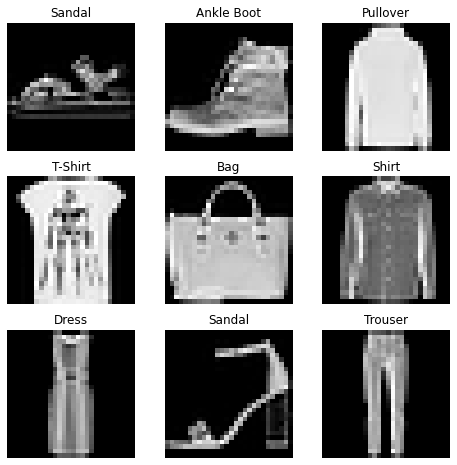

In [51]:
import matplotlib.pyplot as plt
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [67]:
iterator = iter(train_dataloader)
first = next(iterator)
print(first)

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
          ...,
          [0.0000, 0.0000, 0.3176,  ..., 0.6157, 0.5255, 0.0000],
          [0.0000, 0.0000, 0.1137,  ..., 0.4784, 0.4980, 0.0000],
          [0.0000, 0.0000, 0.1098,  ..., 0.5725, 0.4078, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

In [68]:
imgs, labels = first
print(imgs.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


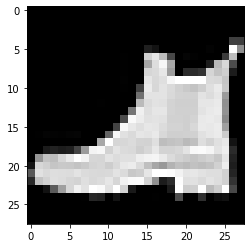

Label: 9


In [96]:
import matplotlib.pyplot as plt
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label.item()}")

In [97]:
model(img.unsqueeze(0).unsqueeze(0).to(device))

tensor([[0.0000, 0.0000, 0.0760, 0.0000, 0.0061, 3.4088, 0.0000, 3.1719, 3.3842,
         5.4894]], device='cuda:0', grad_fn=<ReluBackward0>)

In [71]:
batch_size = 64
imgs = torch.randn(batch_size,1,28,28).to(device)
print(model.forward(imgs).shape)

torch.Size([64, 10])


In [103]:
import torch
import torch.onnx as onnx
import torchvision.models as models
torch.save(model.state_dict(), 'model_weights.pt')

In [104]:
model2 = NeuralNetwork().to(device)
for name, param in model2.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")
model2.load_state_dict(torch.load('model_weights.pt'))
model2.eval()
print('__________________________________________')
for name, param in model2.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0199,  0.0179, -0.0080,  ..., -0.0199,  0.0329, -0.0304],
        [-0.0057,  0.0138,  0.0257,  ...,  0.0310, -0.0095,  0.0193]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0342, -0.0352], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0096,  0.0075, -0.0208,  ..., -0.0256,  0.0013, -0.0294],
        [ 0.0220,  0.0142,  0.0058,  ...,  0.0106,  0.0013,  0.0435]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0031,  0.0420], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[-0.0196, -0.0263,  0.0286,  ..., -0.0117,  0.0156, -0.0427],
        [ 0.0267, -0.0219, -0.0321,  ..

In [106]:
torch.save(model, 'model.pth')
model3 = torch.load('model.pth')

In [111]:
input_image = torch.zeros((1,1,28,28)).to(device)
onnx.export(model, input_image, 'model.onnx')